In [153]:
library(ggplot2)
library(dplyr)
library(zoo)
library(treemap)

In [173]:
df = read.csv('unemployement-rate-1948-2010.csv')
tail(df)

,Series.id,Year,Period,Value
,<chr>,<int>,<chr>,<dbl>
741,LNS14000000,2009,M09,9.8
742,LNS14000000,2009,M10,10.1
743,LNS14000000,2009,M11,10.0
744,LNS14000000,2009,M12,10.0
745,LNS14000000,2010,M01,9.7
746,LNS14000000,2010,M02,9.7


In [174]:
df$date = paste(df$Year, df$Period)
df$time = as.yearmon(df$date, '%Y M%m')
df$month = format(df$time, '%b')
df = subset(df, select = -c(Series.id, Period, date, time))
head(df)

,Year,Value,month
,<int>,<dbl>,<chr>
1,1948,3.4,Jan
2,1948,3.8,Feb
3,1948,4.0,Mar
4,1948,3.9,Apr
5,1948,3.5,May
6,1948,3.6,Jun


In [176]:
grouped_yr = aggregate(Value ~ Year, df, mean)
grouped_totals = aggregate(Value ~ Year, df, sum)
head(grouped_yr)

,Year,Value
,<int>,<dbl>
1,1948,3.750000
2,1949,6.050000
3,1950,5.208333
4,1951,3.283333
5,1952,3.025000
6,1953,2.925000


In [177]:
names(df)[names(df) == 'Value'] = 'Unemployment.rate'

In [178]:
perc_df = merge.data.frame(df, grouped_totals, all.x=TRUE)

In [181]:
perc_df$annual.percent = (perc_df$Unemployment.rate / perc_df$Value) * perc_df$Unemployment.rate
head(perc_df)

,Year,Unemployment.rate,month,Value,annual.percent
,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,1948,3.4,Jan,45,0.2568889
2,1948,3.8,Feb,45,0.3208889
3,1948,4.0,Mar,45,0.3555556
4,1948,3.9,Apr,45,0.3380000
5,1948,3.5,May,45,0.2722222
6,1948,3.6,Jun,45,0.2880000


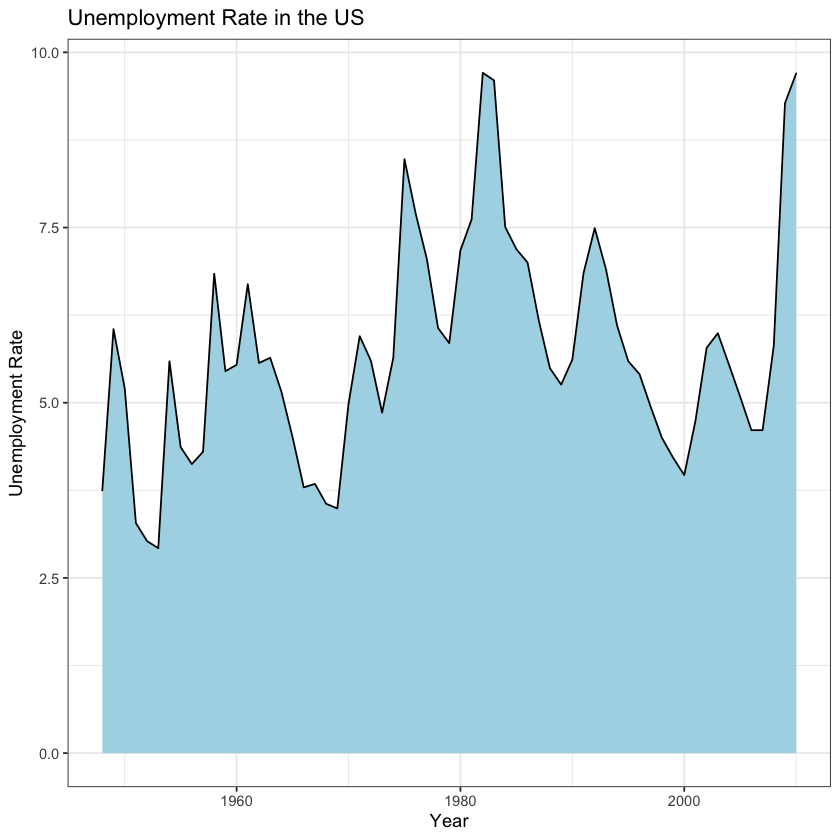

In [182]:
plot = ggplot(grouped_yr, aes(x=Year, y=Value))
plot + geom_area(color='black', fill = 'light blue') +
  theme_bw() +
  ggtitle('Unemployment Rate in the US') +
  labs(x='Year', y='Unemployment Rate')


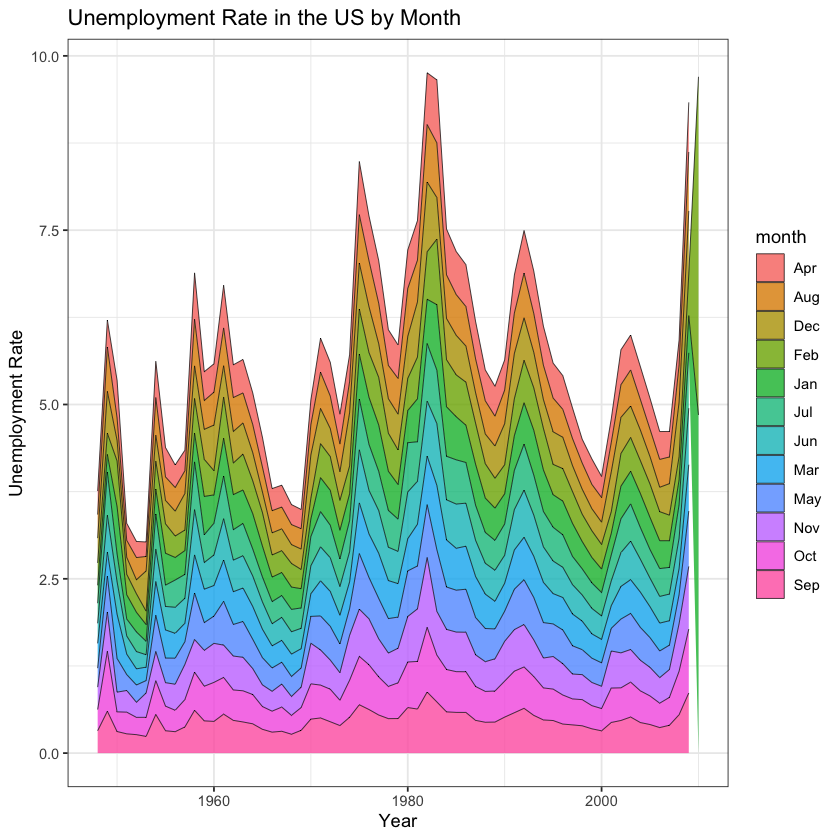

In [183]:
plot = ggplot(perc_df, aes(x=Year, y=annual.percent, fill=month))
plot + geom_area(color="black", size=.2, alpha=.8) +
  theme_bw() +
  ggtitle('Unemployment Rate in the US by Month') +
  labs(x='Year', y='Unemployment Rate')


In [128]:
month_2008 = subset(df, Year=='2008')
month_2008$label <- paste(month_2008$month, month_2008$Unemployment.rate, sep = '\n')
month_2008$label <- paste(month_2008$label, '%')

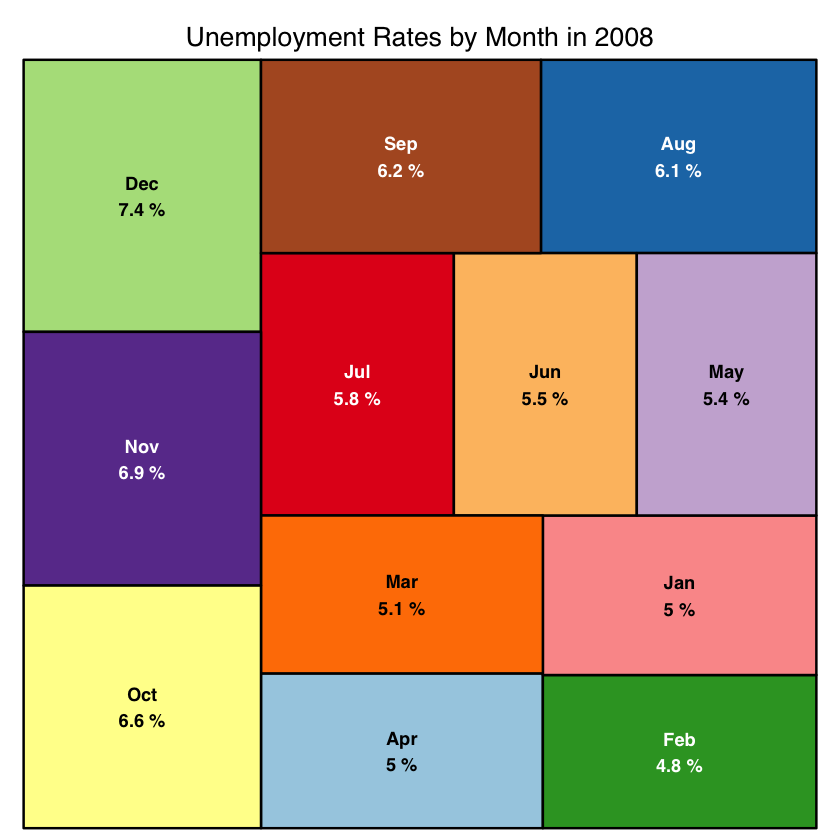

In [129]:
treemap(month_2008, index='label', vSize='Unemployment.rate', type='index', palette='Paired',
        title='Unemployment Rates by Month in 2008', fontsize.title=16)